# ARMA model order selection  for German stock price data

### importing all required libraries

In [1]:
import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
from   IPython.display                 import  display
from   pylab                           import  rcParams 
from   datetime                        import  datetime, timedelta
from statsmodels.tsa.stattools         import  adfuller
from statsmodels.tsa.stattools         import  pacf
from statsmodels.tsa.stattools         import  acf
from statsmodels.graphics.tsaplots     import  plot_pacf
from statsmodels.graphics.tsaplots     import  plot_acf
from statsmodels.graphics.gofplots     import qqplot
from statsmodels.tsa.seasonal          import seasonal_decompose
from statsmodels.tsa.arima_model       import  ARMA
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_excel('GermanMonthlyAverageStockPrice_all.xlsx')

In [3]:
df.head()

,Year,Month,Unnamed: 2,BMW Stock Price,RWE Stock Price,VW Stock Price,KAR Stock Price,Siemens Stock Price,BASF Stock Price
0,1981,Jan,1981 Jan,71.641862,90.840781,101.203743,142.125043,180.720252,67.267076
1,1981,Feb,1981 Feb,72.058110,90.234885,100.461085,133.050295,171.694210,65.864130
2,1981,Mar,1981 Mar,74.685332,89.122195,109.201145,132.121064,173.017127,70.804041
3,1981,Apr,1981 Apr,83.580045,91.747120,114.595910,140.432850,181.780905,72.375145
4,1981,May,1981 May,83.374511,89.389479,111.601658,142.921121,179.199463,70.605226


In [4]:
df.tail()

,Year,Month,Unnamed: 2,BMW Stock Price,RWE Stock Price,VW Stock Price,KAR Stock Price,Siemens Stock Price,BASF Stock Price
151,1993,Aug,1993 Aug,559.454545,412.480209,374.754546,595.490909,671.368182,255.422727
152,1993,Sep,1993 Sep,556.022727,423.819314,362.995454,559.918182,661.768182,252.513636
153,1993,Oct,1993 Oct,603.738095,455.173833,380.952381,587.990476,708.952381,267.576190
154,1993,Nov,1993 Nov,623.404762,456.433319,399.195238,604.347619,719.966667,270.847619
155,1993,Dec,1993 Dec,672.619048,492.228100,422.838095,573.704762,752.733333,286.342857


In [5]:
date = pd.date_range(start='01/01/1981', end='12/31/1993', freq='M')

In [6]:
date

DatetimeIndex(['1981-01-31', '1981-02-28', '1981-03-31', '1981-04-30',
               '1981-05-31', '1981-06-30', '1981-07-31', '1981-08-31',
               '1981-09-30', '1981-10-31',
               ...
               '1993-03-31', '1993-04-30', '1993-05-31', '1993-06-30',
               '1993-07-31', '1993-08-31', '1993-09-30', '1993-10-31',
               '1993-11-30', '1993-12-31'],
              dtype='datetime64[ns]', length=156, freq='M')

### adding month to time series as a new column

In [7]:
df['TimeStamp']=pd.DataFrame(date,columns=['Date'])

In [8]:
df.shape

(156, 10)

In [9]:
df.head()

,Year,Month,Unnamed: 2,BMW Stock Price,RWE Stock Price,VW Stock Price,KAR Stock Price,Siemens Stock Price,BASF Stock Price,TimeStamp
0,1981,Jan,1981 Jan,71.641862,90.840781,101.203743,142.125043,180.720252,67.267076,1981-01-31
1,1981,Feb,1981 Feb,72.058110,90.234885,100.461085,133.050295,171.694210,65.864130,1981-02-28
2,1981,Mar,1981 Mar,74.685332,89.122195,109.201145,132.121064,173.017127,70.804041,1981-03-31
3,1981,Apr,1981 Apr,83.580045,91.747120,114.595910,140.432850,181.780905,72.375145,1981-04-30
4,1981,May,1981 May,83.374511,89.389479,111.601658,142.921121,179.199463,70.605226,1981-05-31


In [10]:
df['TimeStamp'] = pd.to_datetime(df['TimeStamp'])
df_model = df.set_index('TimeStamp')
df_model.head()

,Year,Month,Unnamed: 2,BMW Stock Price,RWE Stock Price,VW Stock Price,KAR Stock Price,Siemens Stock Price,BASF Stock Price
TimeStamp,,,,,,,,,
1981-01-31,1981,Jan,1981 Jan,71.641862,90.840781,101.203743,142.125043,180.720252,67.267076
1981-02-28,1981,Feb,1981 Feb,72.058110,90.234885,100.461085,133.050295,171.694210,65.864130
1981-03-31,1981,Mar,1981 Mar,74.685332,89.122195,109.201145,132.121064,173.017127,70.804041
1981-04-30,1981,Apr,1981 Apr,83.580045,91.747120,114.595910,140.432850,181.780905,72.375145
1981-05-31,1981,May,1981 May,83.374511,89.389479,111.601658,142.921121,179.199463,70.605226


### dropping unwanted columns

In [11]:
df_model=df_model.drop(['Year','Month','Unnamed: 2'],axis=1)

In [12]:
df_model.head()

,BMW Stock Price,RWE Stock Price,VW Stock Price,KAR Stock Price,Siemens Stock Price,BASF Stock Price
TimeStamp,,,,,,
1981-01-31,71.641862,90.840781,101.203743,142.125043,180.720252,67.267076
1981-02-28,72.058110,90.234885,100.461085,133.050295,171.694210,65.864130
1981-03-31,74.685332,89.122195,109.201145,132.121064,173.017127,70.804041
1981-04-30,83.580045,91.747120,114.595910,140.432850,181.780905,72.375145
1981-05-31,83.374511,89.389479,111.601658,142.921121,179.199463,70.605226


## analysis for BMW stock price

### plotting time series

In [13]:
rcParams['figure.figsize'] = 25,8

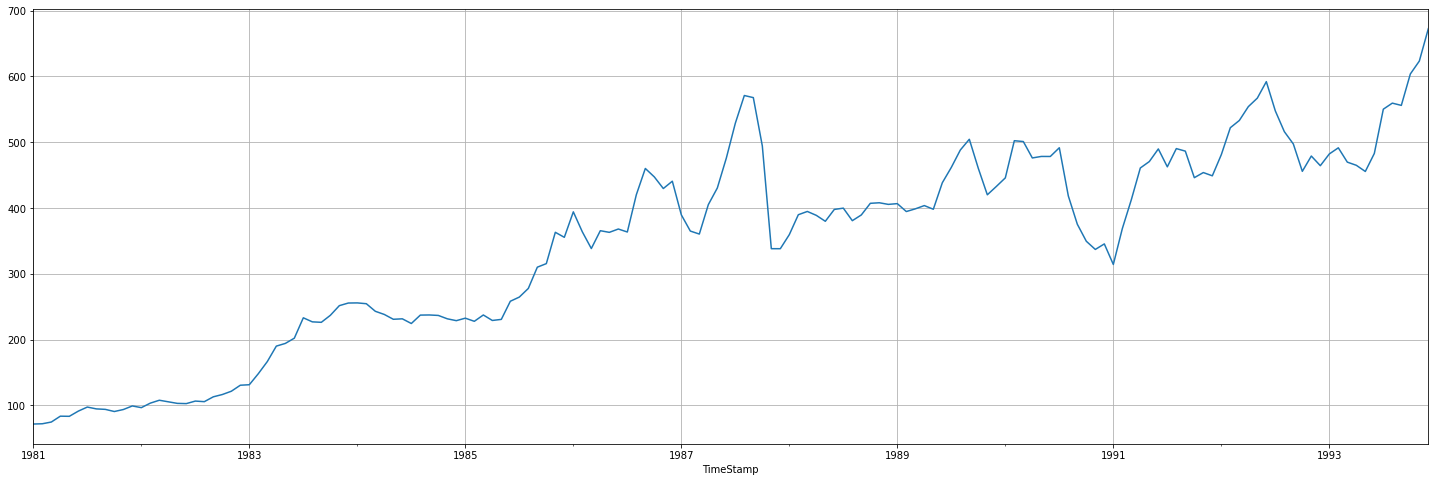

In [14]:
df_model['BMW Stock Price'].plot(grid=True);

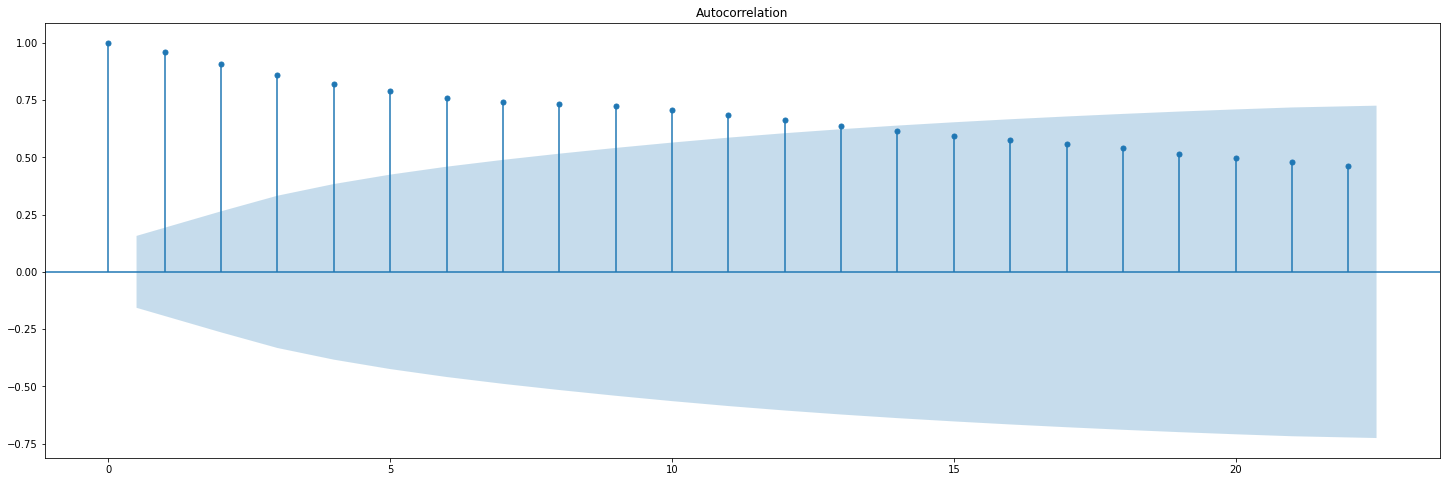

In [16]:
plot_acf(df_model['BMW Stock Price']);

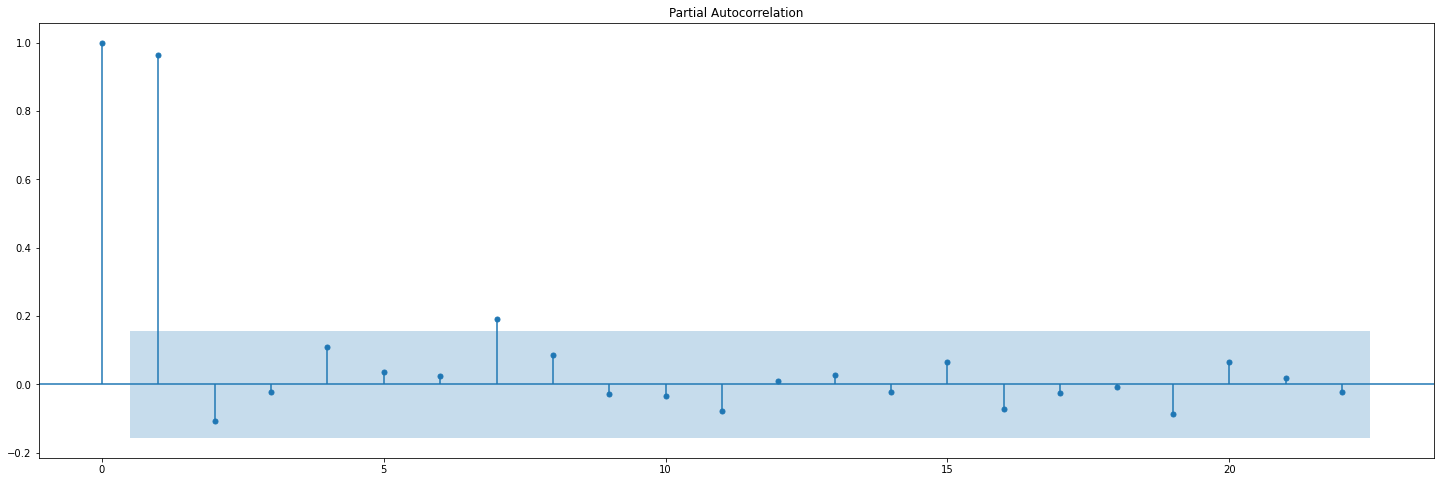

In [17]:
plot_pacf(df_model['BMW Stock Price']);

## analysis for RWE stock price

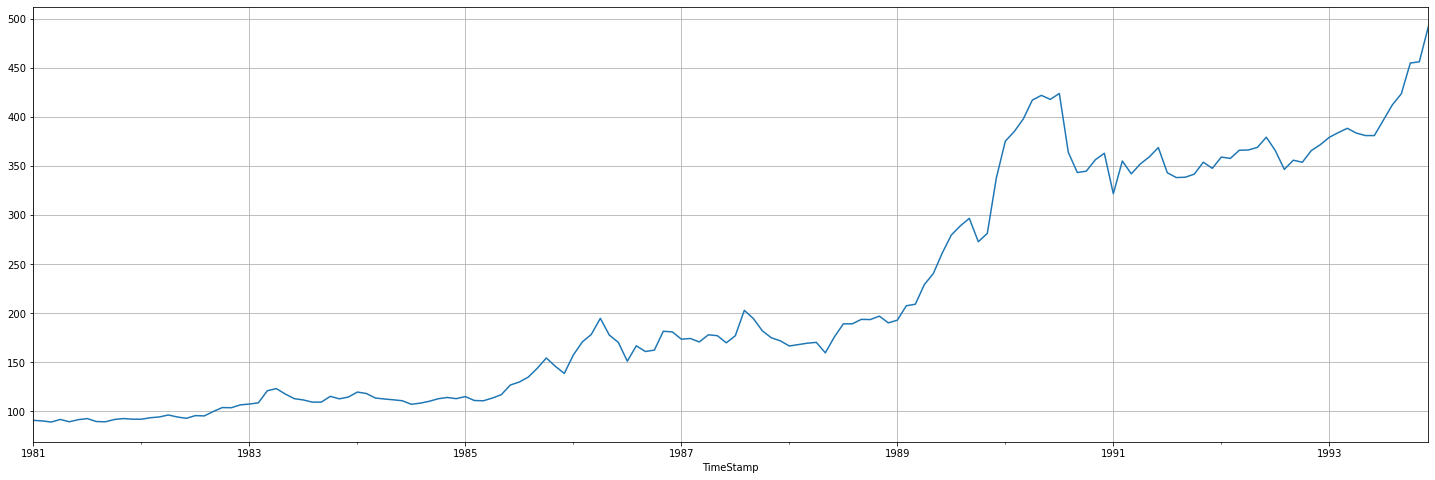

In [18]:
df_model['RWE Stock Price'].plot(grid=True);

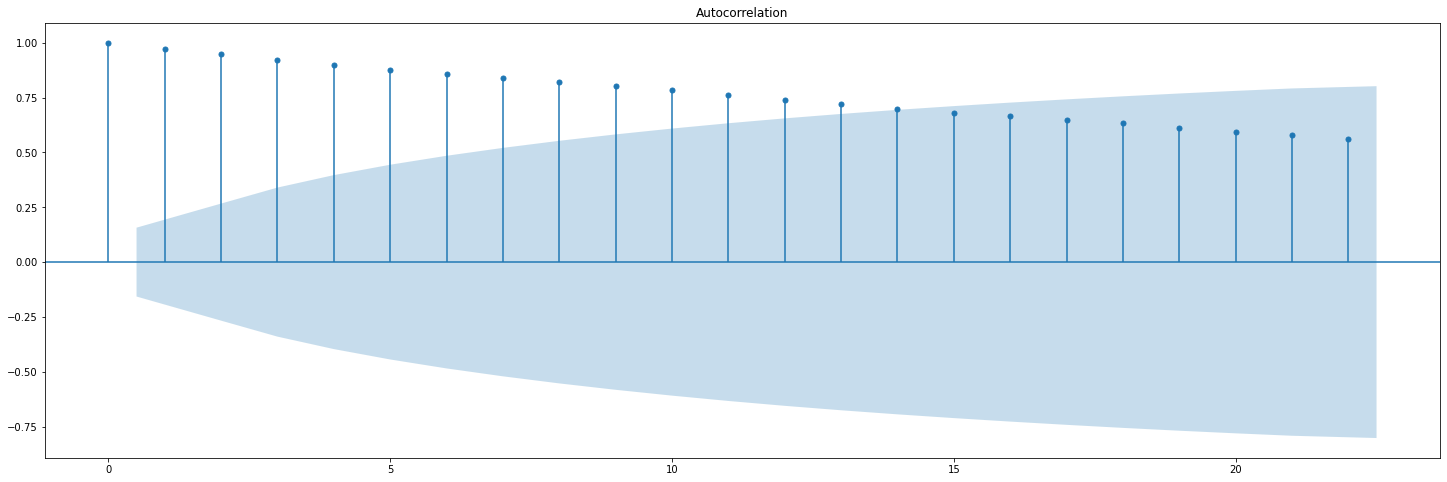

In [19]:
plot_acf(df_model['RWE Stock Price']);

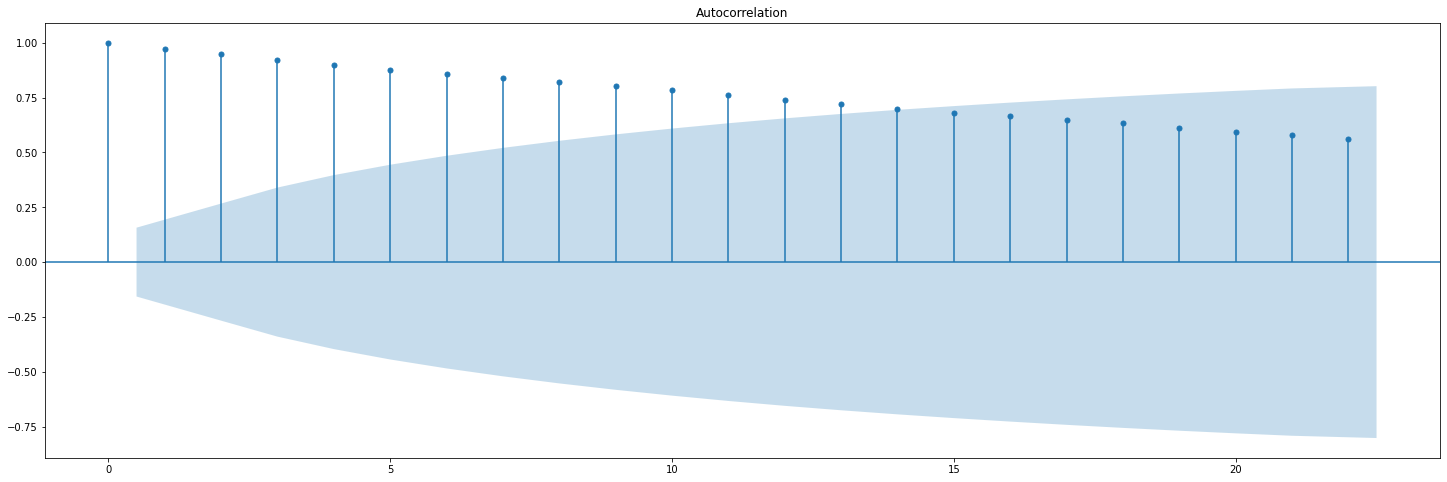

In [20]:
plot_acf(df_model['RWE Stock Price']);

## analysis for VW stock price

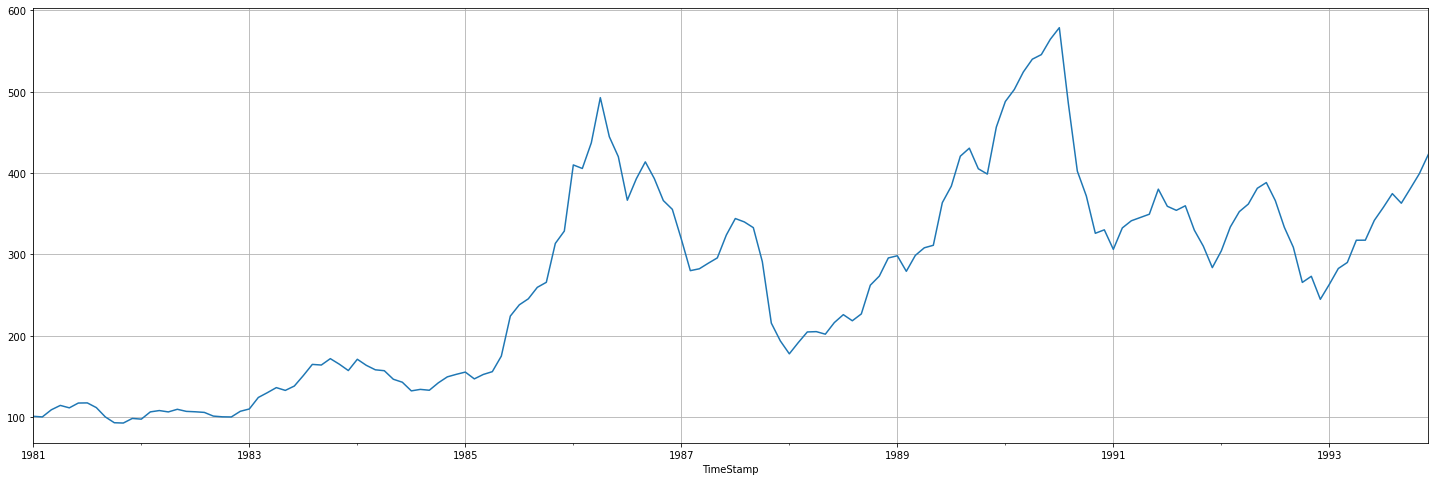

In [21]:
df_model['VW Stock Price'].plot(grid=True);

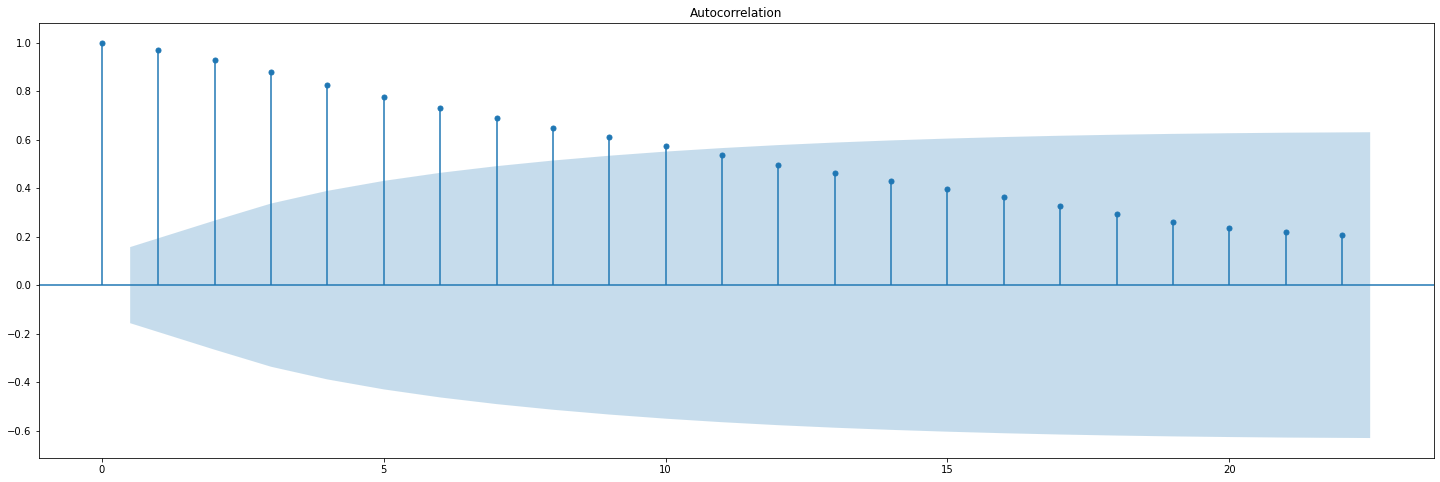

In [22]:
plot_acf(df_model['VW Stock Price']);

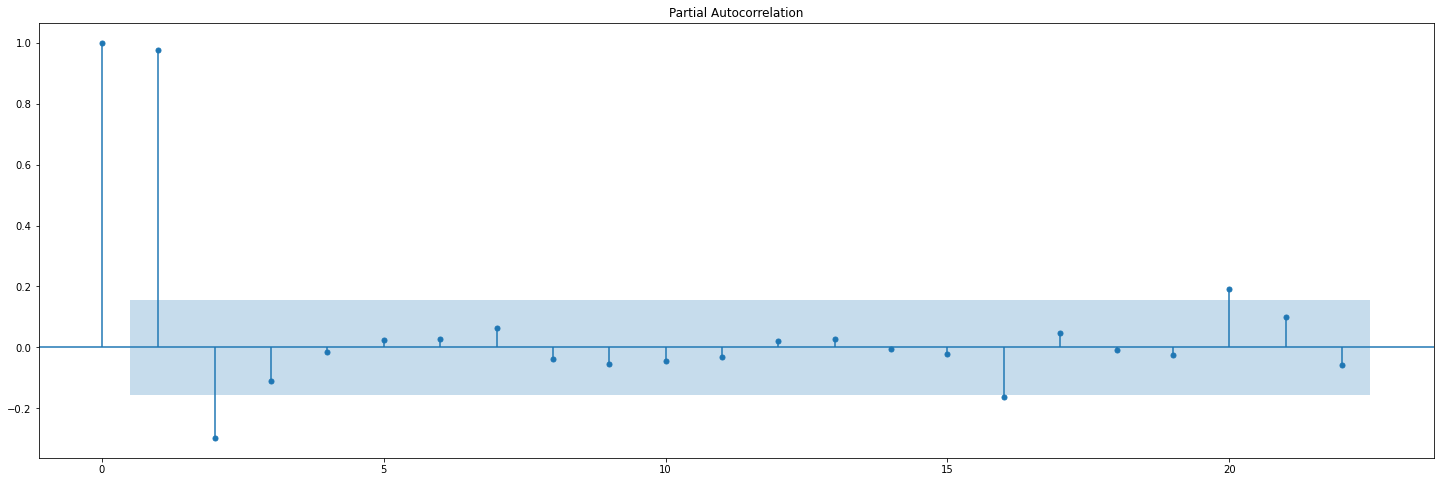

In [24]:
plot_pacf(df_model['VW Stock Price']);

## analysis for KAR stock price

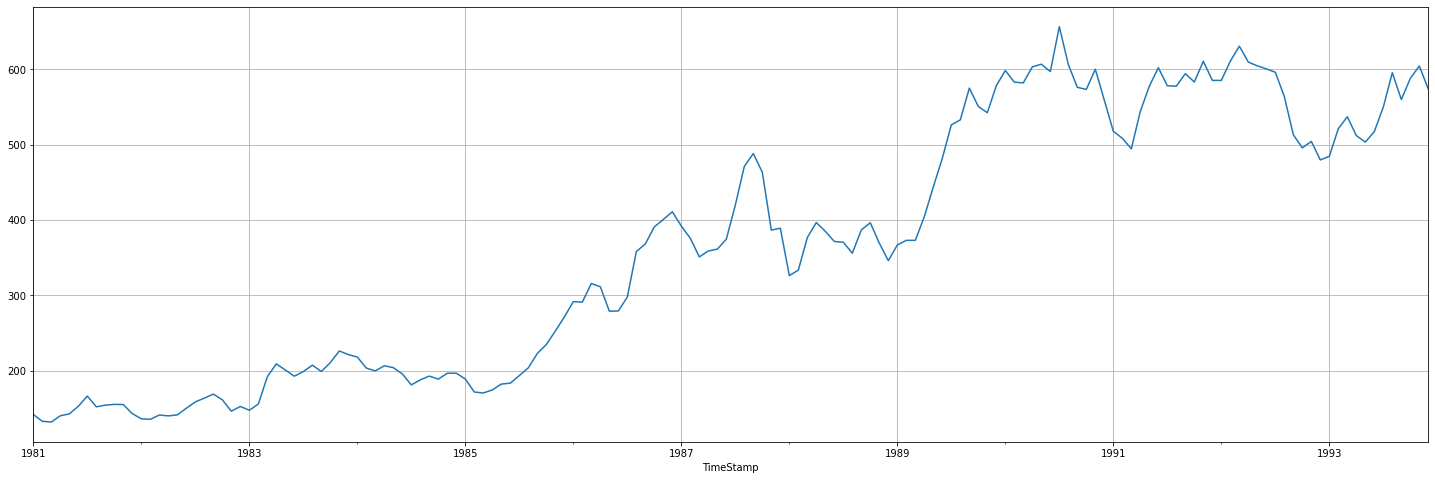

In [25]:
df_model['KAR Stock Price'].plot(grid=True);

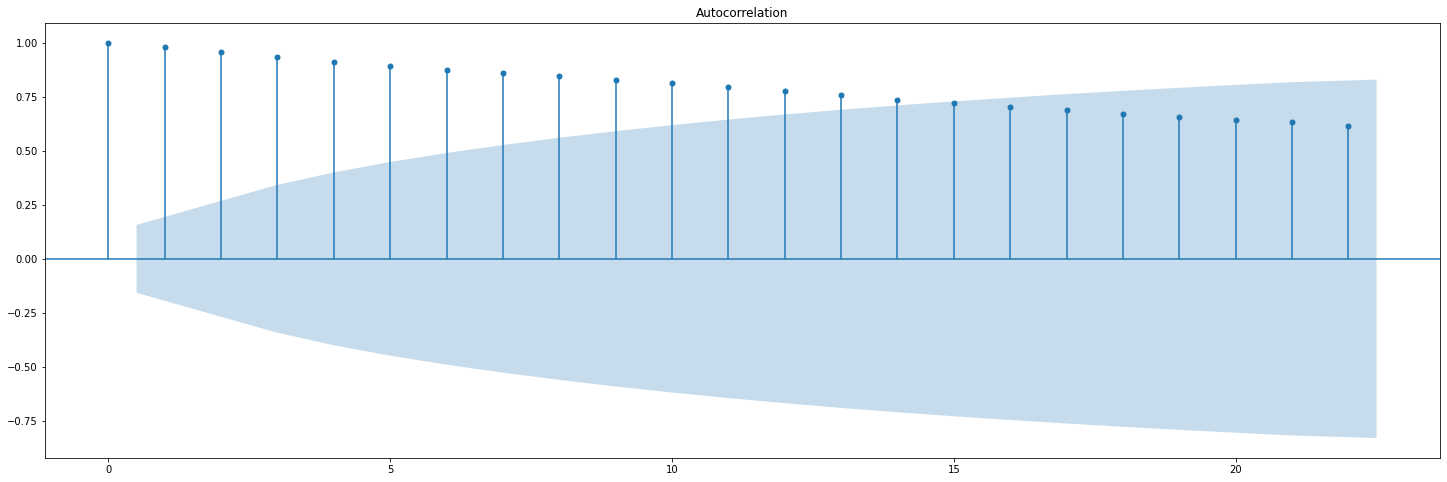

In [26]:
plot_acf(df_model['KAR Stock Price']);

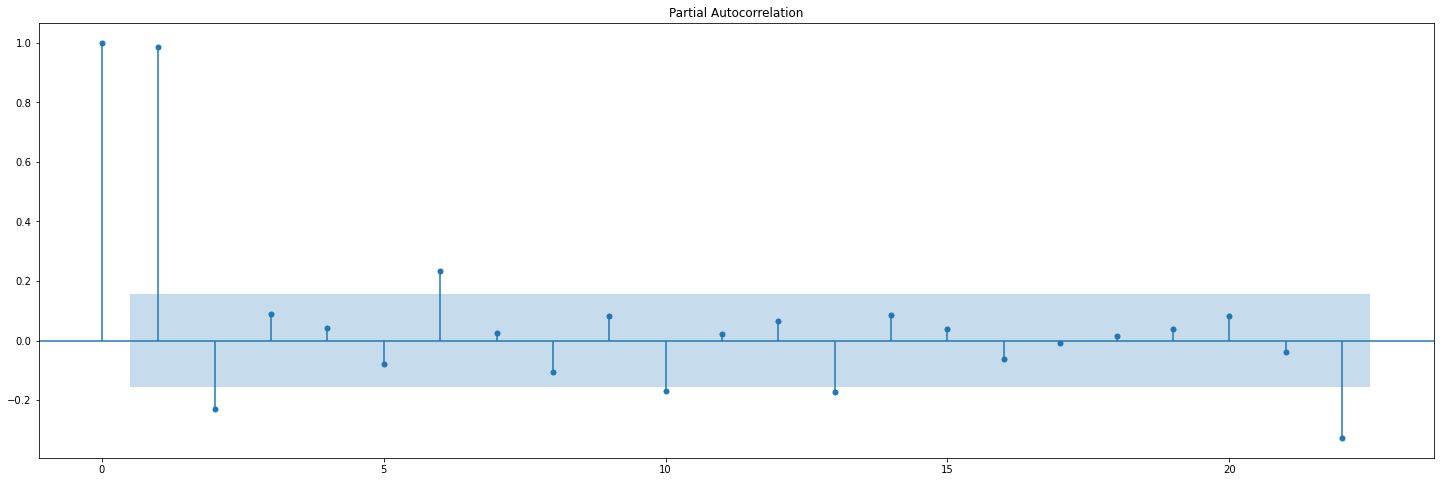

In [27]:
plot_pacf(df_model['KAR Stock Price']);

## analysis for Siemens Stock Price

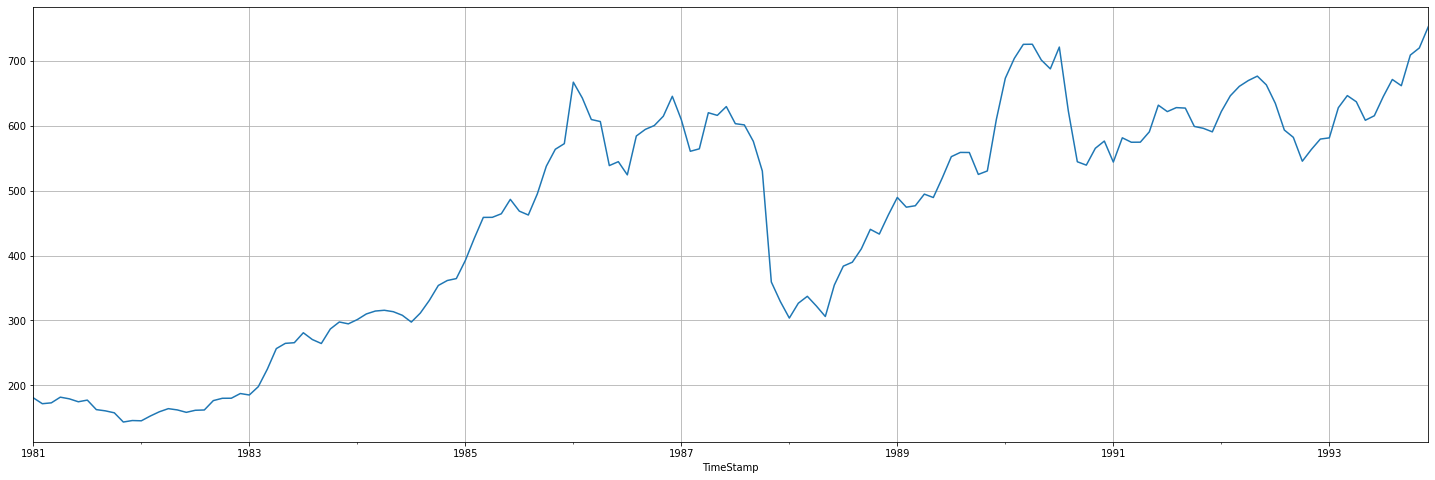

In [28]:
df_model['Siemens Stock Price'].plot(grid=True);

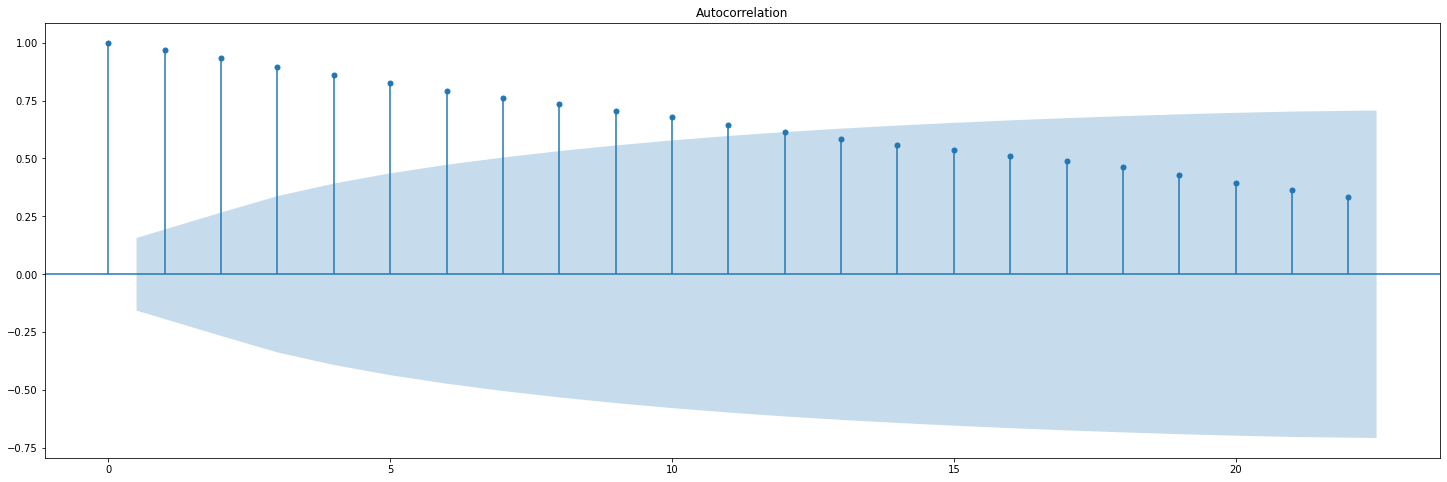

In [29]:
plot_acf(df_model['Siemens Stock Price']);

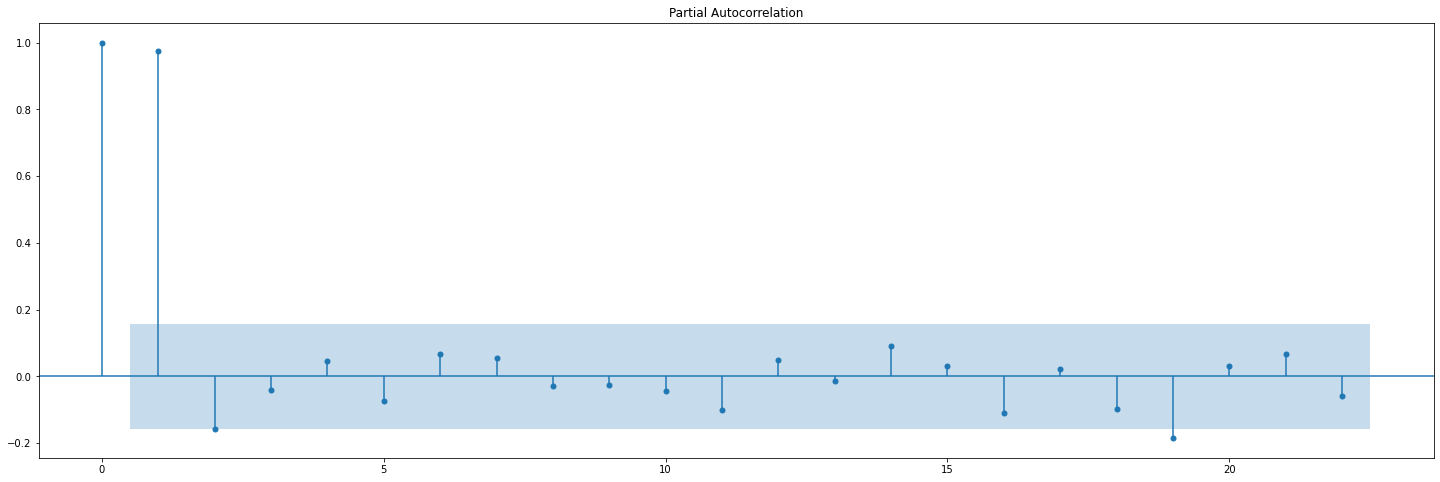

In [30]:
plot_pacf(df_model['Siemens Stock Price']);

## Analaysis of BASF stock price

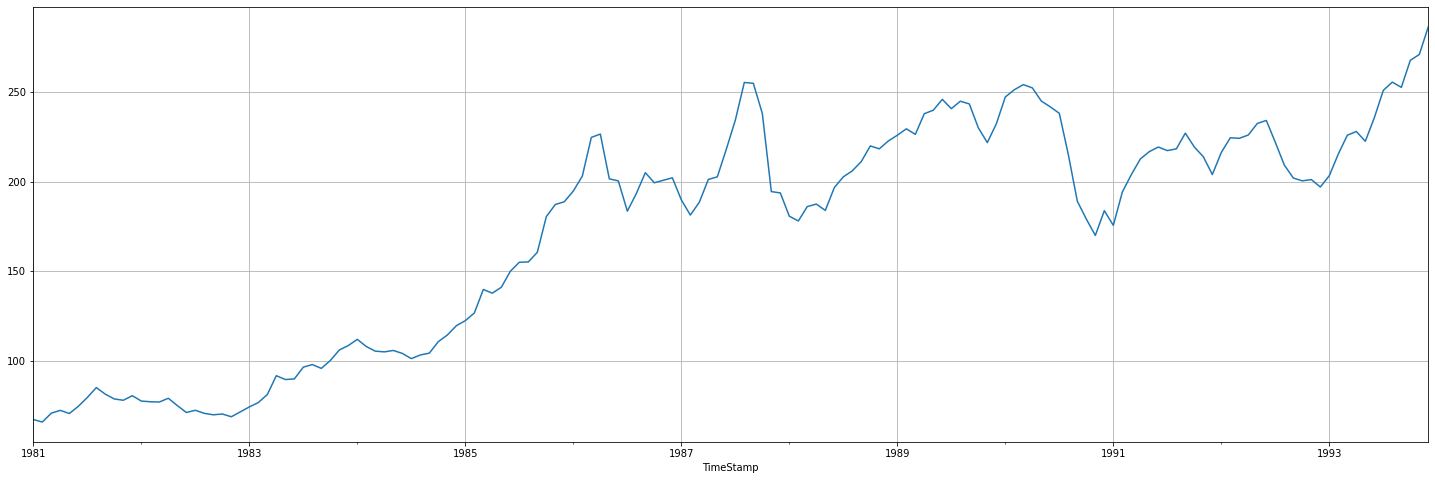

In [31]:
df_model['BASF Stock Price'].plot(grid=True);

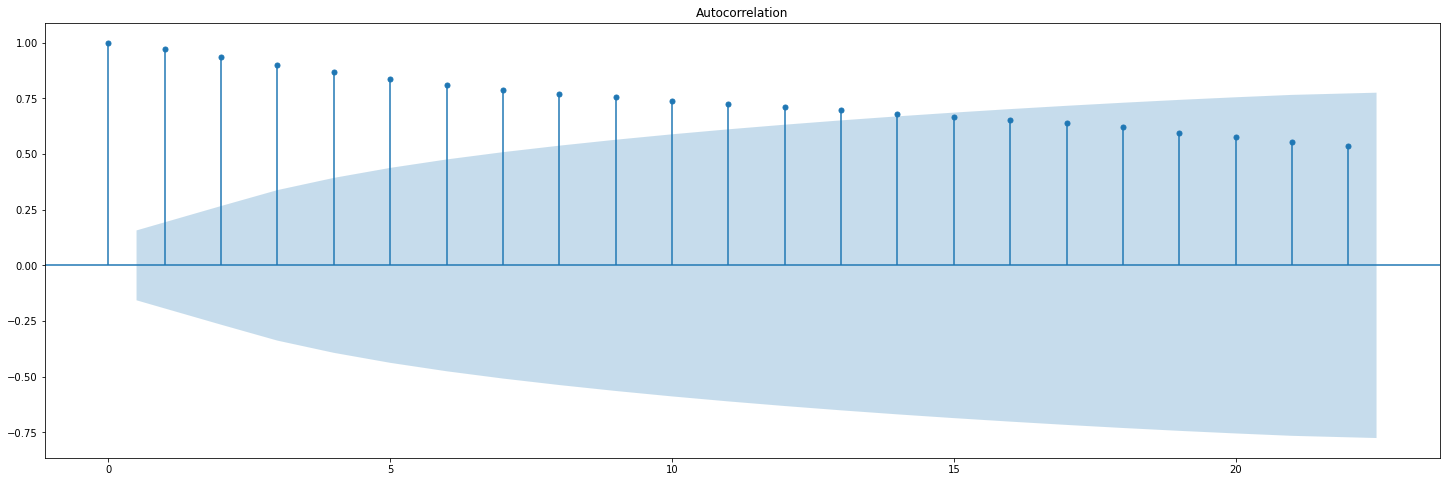

In [32]:
plot_acf(df_model['BASF Stock Price']);

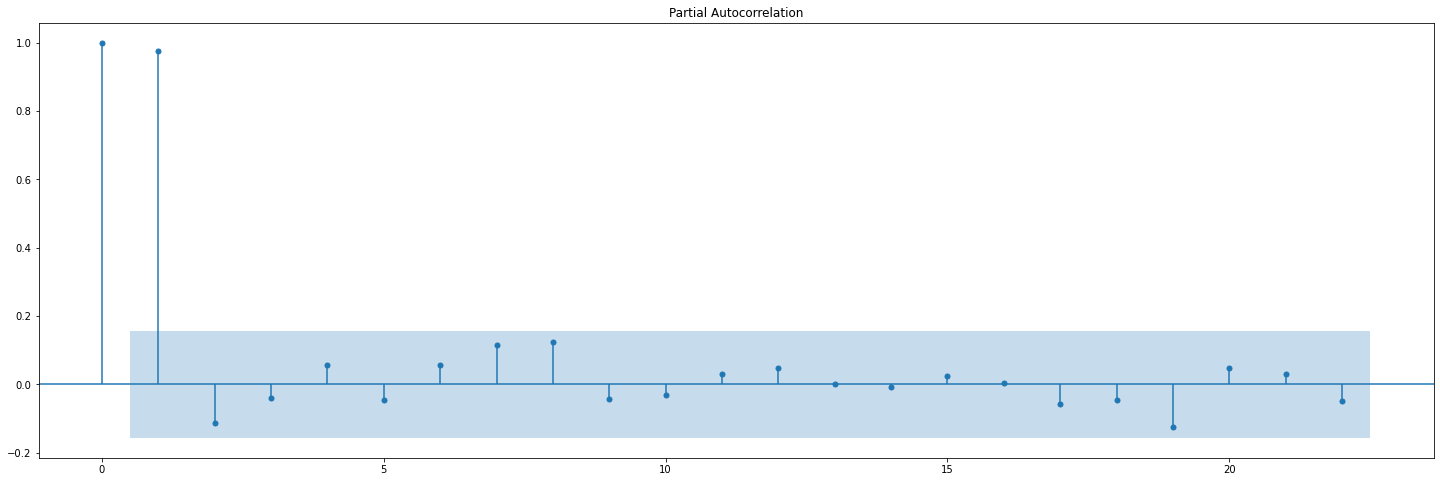

In [33]:
plot_pacf(df_model['BASF Stock Price']);

## stationarity test

In [34]:
observations= df_model['BASF Stock Price'].values
test_result = adfuller(observations)

In [35]:
print('ADF Statistic: %f' % test_result[0])
print('p-value: %f' % test_result[1])
print('Critical Values:')
for key, value in test_result[4].items():
	print('\t%s: %.5f' % (key, value))

ADF Statistic: -1.113044
p-value: 0.709842
Critical Values:
	1%: -3.47354
	5%: -2.88050
	10%: -2.57688


## differencing to make series stationary

In [36]:
df_diff=df_model['BASF Stock Price'].diff().dropna()

In [37]:
observations= df_diff.values
test_result = adfuller(observations)

In [38]:
print('ADF Statistic: %f' % test_result[0])
print('p-value: %f' % test_result[1])
print('Critical Values:')
for key, value in test_result[4].items():
	print('\t%s: %.5f' % (key, value))

ADF Statistic: -8.698613
p-value: 0.000000
Critical Values:
	1%: -3.47354
	5%: -2.88050
	10%: -2.57688


## ACF and PACF plot for new time series after differencing

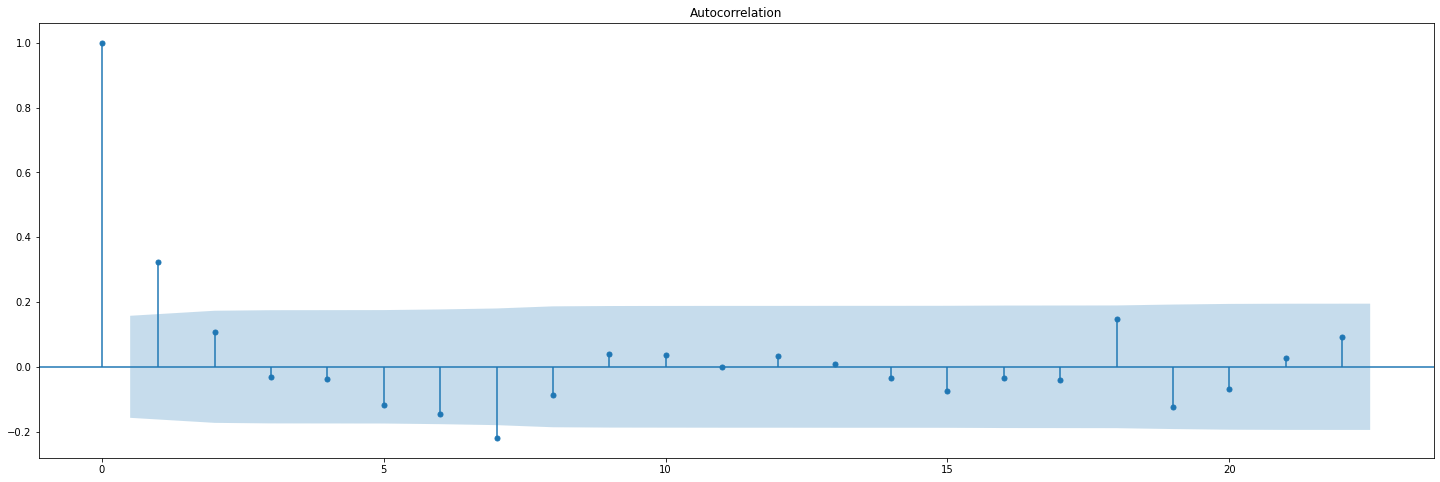

In [39]:
plot_acf(df_diff);

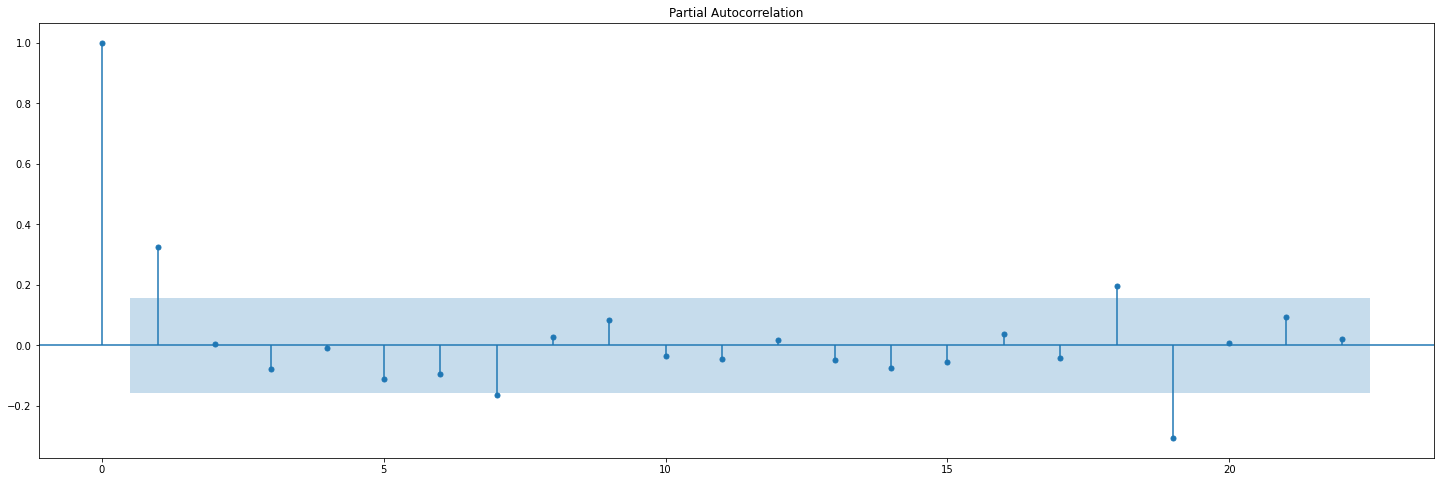

In [40]:
plot_pacf(df_diff);